In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('1-studyhours.csv')

In [3]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [5]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


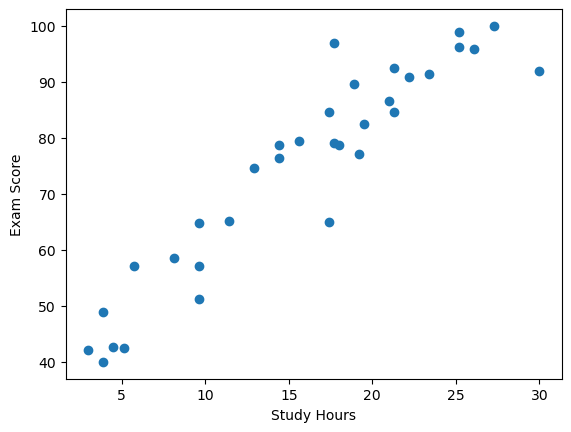

In [6]:
plt.scatter(df['Study Hours'],df['Exam Score'])
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()

In [7]:
#Independent(X) and dependent(y)features

#X = df['Study Hours']
#y = df['Exam Score']

#Ama bunları bu şekilde yapmamamız gerekiyor !!!!
#Typelarına bakınca ikisinin de series oldugunu görürürz

#----------------------------------------------------

#Regresyon gibi birçok ML algoritması çoğu zaman X'i yani girdiyi data frame olarak vermemizi ister. Series olarak değil
#y yani çıktı ise series olur
#X'i data frame olarak vermek için:
X = df[['Study Hours']]
y = df['Exam Score']

In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
type(y)

pandas.core.series.Series

## Test - Train Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=15)

In [12]:
y_train

18     64.9
1      57.1
2      42.7
32     89.6
6      77.1
3      65.1
29     82.4
26     64.8
9      84.6
4      78.7
28     79.1
10     92.4
27     79.5
13    100.0
17     74.7
15     97.0
22     76.5
31     96.2
11     95.9
7      90.8
0      40.0
23     42.2
5      78.8
12     92.0
21     58.5
8      99.0
Name: Exam Score, dtype: float64

In [13]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

### Standardization

In [14]:
# Standardize the data set - Veri setini standartlaştırmak

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [17]:
# balanced feature values
# efficient gradient descent
# l1, l2 kolonlara cezalar verebiliyoruz

In [18]:
scaler = StandardScaler() #sınıftan obje olusturduk

In [19]:
X_train

,Study Hours
18,17.4
1,9.6
2,4.5
32,18.9
6,19.2
3,11.4
29,19.5
26,9.6
9,17.4
4,14.4


In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[ 0.11794385],
       [-0.97424848],
       [-1.68837424],
       [ 0.32798083],
       [ 0.36998823],
       [-0.7222041 ],
       [ 0.41199563],
       [-0.97424848],
       [ 0.11794385],
       [-0.30213013],
       [ 0.15995124],
       [ 0.66404001],
       [-0.13410054],
       [ 1.50418796],
       [-0.51216711],
       [ 0.15995124],
       [-0.30213013],
       [ 1.21013618],
       [ 1.33615837],
       [ 0.7900622 ],
       [-1.77238903],
       [-1.89841122],
       [ 0.20195864],
       [ 1.88225453],
       [-1.18428547],
       [ 1.21013618]])

In [22]:
X_test

array([[-1.60435944],
       [ 0.62203261],
       [ 0.95809179],
       [-1.52034465],
       [-0.97424848],
       [-1.77238903],
       [ 0.66404001]])

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regression = LinearRegression()

In [25]:
regression.fit(X_train, y_train) #eğitim yapmak için fit kullanırız

LinearRegression()

In [26]:
print("Coefficient:" , regression.coef_)  #teta 1'i görelim
print("Intercept:" , regression.intercept_) #nerde kestiğini bulmak için

Coefficient: [16.17860223]
Intercept: 76.9076923076923


In [27]:
#Bu ne demek peki:
# y = 76.90 + 16.18 x   çıkmış (x standardscale edilmiş halidir)


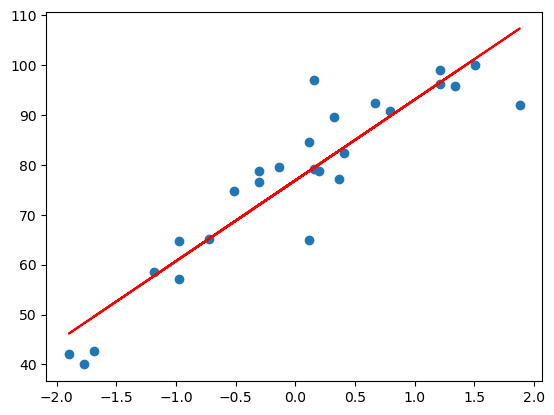

In [28]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train),"r") #predict tahmin eder
plt.show() 
#Best fit line'ı kırmızı çizgi ile gösterelim:

In [29]:
# 20 saat çalışmış bir insanın sınav sonucu kaç olabilir, çıktı kaç olacak hesaplamaya çalışalım:
# x = 20, y= ? olacak

In [30]:
regression.predict([[20]]) 

array([400.47973694])

In [31]:
#20'yi verince bize 400 verdi ama bizim 20'yi standardscale ile vermemiz lazım:
scaler.transform([[20]])
#Yani aslında 0.48 vermemiz gerekiyormus

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.48200796]])

In [32]:
#Yani 20 saat çalışan birinin exam score'u:
regression.predict(scaler.transform([[20]]))

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [33]:
#10 saat çalışan biri kaç alır?
regression.predict(scaler.transform([[10]]))

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([62.05187491])

In [34]:
# 0 saat çalışan biri kaç alır?
regression.predict(scaler.transform([[0]]))

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([39.39784252])

In [35]:
#25 saat çalışan biri?
regression.predict(scaler.transform([[25]]))

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([96.0329235])

In [36]:
# test verisi ile birlikte prediction (tahmin) yapabiliriz
regression.predict(X_test)

array([50.95139904, 86.97131054, 92.40827832, 52.31064098, 61.14571361,
       48.23291515, 87.65093152])

In [37]:
X_test #scale edilimiş çalışma saatleri vardı içinde

array([[-1.60435944],
       [ 0.62203261],
       [ 0.95809179],
       [-1.52034465],
       [-0.97424848],
       [-1.77238903],
       [ 0.66404001]])

In [38]:
#test ile yaptığımız tahmini kaydedelim
y_prediction = regression.predict(X_test)

In [40]:
y_test #gerçek test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

In [41]:
#tahminlerimle, y_test'tekileri kıyaslayabilirim

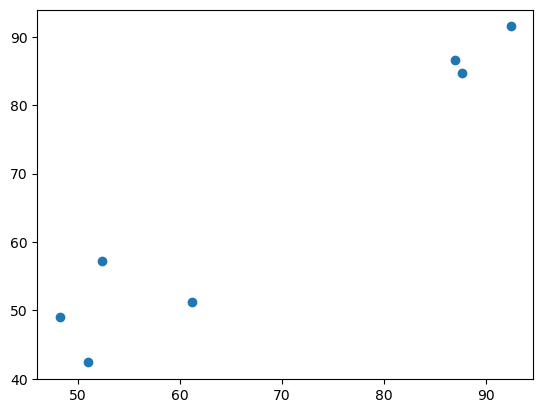

In [42]:
plt.scatter(y_prediction,y_test)
plt.show() #çizdirdiğimizde ne kadar doğrusal bir şey alırsak, o kadar mantıklı bir şey yapmışsınızdır

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
mse = mean_squared_error(y_test, y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
rmse = np.sqrt(mse)
print("mse: ", mse)
print("mae: ", mae)
print(r"mse: ", rmse)

mse:  29.45839048833392
mae:  4.054868128856142
mse:  5.427558427906043


In [45]:
r2 = r2_score(y_test,y_prediction)
print("r2 score: ", r2)

r2 score:  0.9196596206825491


In [48]:
#r2 adjusted formülü:
r2_adjusted = 1-(1-r2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [49]:
r2_adjusted

0.903591544819059